# Using PCA to dimentionalise the MNIST DataSet

Use PCA to reduce the dimensionality of the MNIST dataset (handwritten digits) and classify the digits using a simple classifier

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
digits = load_digits()
x = digits.data  
y = digits.target 

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Scaling the Model 

In [9]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# PCA Dimentionality function

In [11]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# Visualizing the model

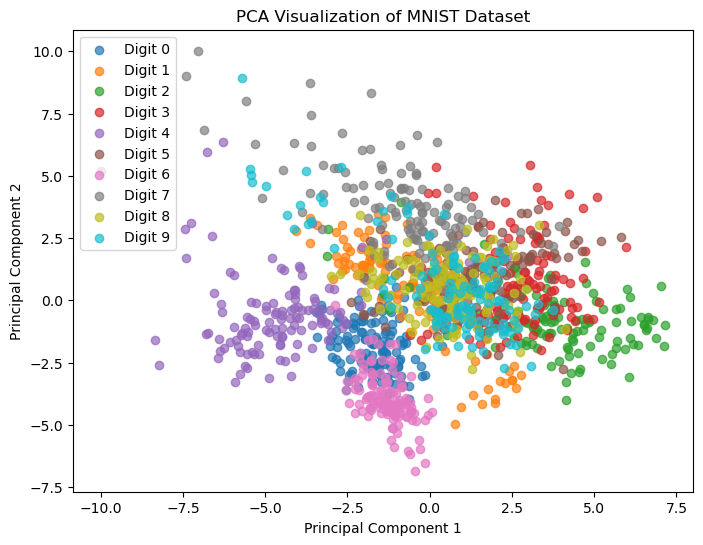

In [14]:
plt.figure(figsize=(8, 6))
for digit in np.unique(y_train):
    plt.scatter(
        x= x_train_pca[y_train == digit, 0],
        y =x_train_pca[y_train == digit, 1],
        label=f"Digit {digit}",
        alpha=0.7
    )
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of MNIST Dataset")
plt.legend()
plt.show()

# Creating the Logistic regression model 

In [15]:
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(x_train_pca, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [16]:
y_pred = clf.predict(x_test_pca)

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5314814814814814

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.68      0.69        53
           1       0.32      0.50      0.39        50
           2       0.49      0.79      0.61        47
           3       0.40      0.37      0.38        54
           4       0.90      0.88      0.89        60
           5       0.34      0.17      0.22        66
           6       0.83      0.91      0.86        53
           7       0.63      0.80      0.70        55
           8       0.21      0.30      0.25        43
           9       0.00      0.00      0.00        59

    accuracy                           0.53       540
   macro avg       0.48      0.54      0.50       540
weighted avg       0.49      0.53      0.50       540


Confusion Matrix:
 [[36  5  0  0  3  0  9  0  0  0]
 [ 1 25  8  0  0  1  0  2 13  0]
 [ 0  2 37  4  0  2  0  0  2  0]
 [ 1  1 16 20  0  5  0  9  2  0]
 [ 4  2  0  0 53  0  1  0  0  0]
 [

# Plot the Explained Varience Ratio

In [19]:
pca_full = PCA().fit(x_train_scaled)
explained_variance_ratio = np.cumsum(pca_full.explained_variance_ratio_)

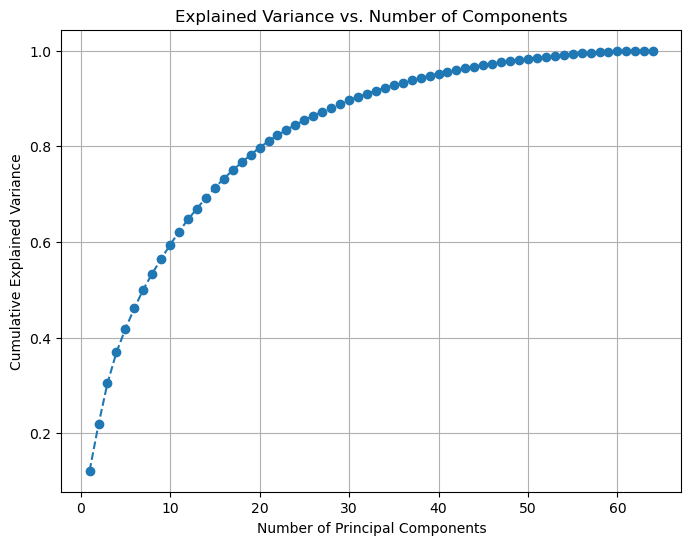

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker="o", linestyle="--")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid()
plt.show()